# - Redes Neuronais + Backpropagation

## Informações do Projeto

- **Aluno**: Laisson Bruno dos Reis Germano
- **Professor**: Dr Adriano Alonso Veloso
- **Disciplina**: Aprendizado de Máquina
- **Programa**: UFMG - Programa de pós graduação em ciência da computação - Mestrado

## Descrição do Projeto

Neste trabalho, você irá implementar uma rede neural com três camadas para classificação de dígitos manuscritos utilizando o dataset MNIST. A rede neural será composta por:

1. **Camada de Entrada**: Cada unidade representa uma dimensão do dado de entrada.
2. **Camada Oculta**: Cada unidade representa uma transformação a partir das unidades de entrada.
3. **Camada de Saída**: Cada unidade representa a probabilidade da saída correspondente ser a correta.

## Especificações da Rede Neural

- **Função de Ativação**: Sigmóide para introduzir não-linearidade.
- **Função de Perda**: Cross Entropy, que será minimizada durante o treinamento.
- **Dados**: O dataset MNIST, contendo 5000 entradas, onde cada entrada refere-se a um dígito escrito manualmente. Cada entrada é uma matriz de 28x28 pixels, representada como um vetor de 784 dimensões. A primeira coluna do arquivo é o rótulo do dígito correto.

## Estrutura da Rede Neural

- **Unidades de Entrada**: 784
- **Unidades de Saída**: 10
- **Unidades na Camada Oculta**: Variar entre 25, 50 e 100

## Algoritmos de Cálculo de Gradiente

Você deverá comparar os seguintes algoritmos de cálculo de gradiente:

1. **Gradient Descent**: O gradiente é calculado após cada época (após as 5000 entradas serem processadas).
2. **Stochastic Gradient Descent**: O gradiente é calculado após cada entrada.
3. **Mini-Batch Gradient Descent**: O gradiente é calculado após um certo número de entradas (considere 10 e 50).

## Taxas de Aprendizado

Você deverá variar a taxa de aprendizado entre os seguintes valores: 0.5, 1, 10.

## Experimentos e Resultados

O documento a ser entregue deverá apresentar os resultados dos seus experimentos, incluindo:

- Discussão sobre a variação do número de unidades na camada oculta para cada um dos três algoritmos de cálculo de gradiente.
- Gráficos mostrando a convergência do erro empírico para cada situação (unidades na camada oculta, algoritmo de cálculo do gradiente, taxa de aprendizado).
- Hipóteses e considerações pertinentes.

## Ferramentas Recomendadas

Você pode utilizar pacotes que facilitam a implementação e treinamento de redes neurais, como PyTorch ou TensorFlow.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical

In [ ]:
# Função para carregar e dividir dados do CSV considerando o primeiro elemento como rótulo
def load_and_split_data(csv_path, test_size=0.2):
    data = pd.read_csv(csv_path, header=None, on_bad_lines='warn')

    # O primeiro valor em cada linha é o rótulo
    x = data.iloc[:, 1:].values / 255.0  # Todos os valores após o primeiro
    y = data.iloc[:, 0].values  # O primeiro valor de cada linha

    # Dividir os dados em treinamento e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
    return (x_train, y_train), (x_test, y_test)

# Caminho para o arquivo CSV
csv_path = 'data_tp1.csv'
(x_train, y_train), (x_test, y_test) = load_and_split_data(csv_path)

In [ ]:
# Normalização dos dados
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Conversão das saídas em categorias
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Definição da rede neural
model = Sequential()
model.add(Dense(784, input_shape=(784,), activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))  # Variando o número de unidades na camada oculta
model.add(Dense(10, activation='softmax'))

# Compilacao da rede neural
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.5), metrics=['accuracy'])

# Treinamento da rede neural
history = model.fit(x_train, y_train, epochs=10, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/10
2024-06-06 12:00:06.506792: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-06-06 12:00:06.506861: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-06 12:00:06.506908: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-27846989-239d-4332-9b2f-d732e3942e53): /proc/driver/nvidia/version does not exist
2024-06-06 12:00:06.507335: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/optim

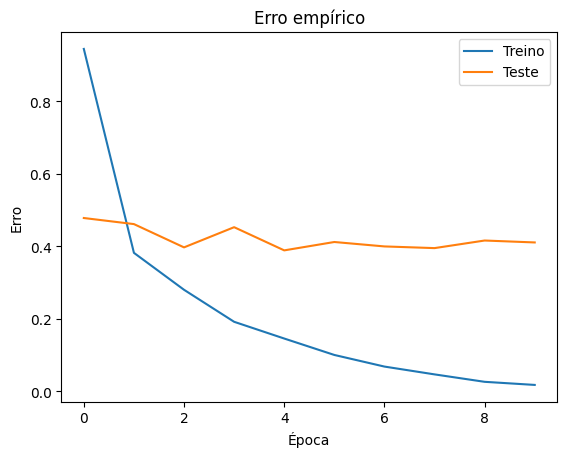

In [ ]:
# Plotagem do erro empírico
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Erro empírico')
plt.xlabel('Época')
plt.ylabel('Erro')
plt.legend(['Treino', 'Teste'])
plt.show()

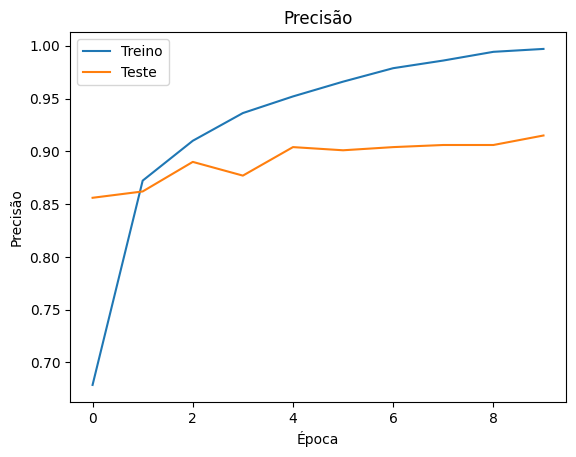

In [ ]:
# Plotagem da precisão
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisão')
plt.xlabel('Época')
plt.ylabel('Precisão')
plt.legend(['Treino', 'Teste'])
plt.show()

Epoch 1/10
400/400 [==============================] - 2s 5ms/step - loss: 0.9763 - accuracy: 0.6727 - val_loss: 0.5829 - val_accuracy: 0.8260
Epoch 2/10
400/400 [==============================] - 2s 5ms/step - loss: 0.4649 - accuracy: 0.8497 - val_loss: 0.6018 - val_accuracy: 0.8160
Epoch 3/10
400/400 [==============================] - 2s 5ms/step - loss: 0.3412 - accuracy: 0.8932 - val_loss: 0.4357 - val_accuracy: 0.8820
Epoch 4/10
400/400 [==============================] - 2s 5ms/step - loss: 0.2898 - accuracy: 0.9103 - val_loss: 0.4222 - val_accuracy: 0.8880
Epoch 5/10
400/400 [==============================] - 2s 5ms/step - loss: 0.2145 - accuracy: 0.9312 - val_loss: 0.4334 - val_accuracy: 0.8890
Epoch 6/10
400/400 [==============================] - 2s 5ms/step - loss: 0.1708 - accuracy: 0.9480 - val_loss: 0.4294 - val_accuracy: 0.8930
Epoch 7/10
400/400 [==============================] - 2s 5ms/step - loss: 0.1276 - accuracy: 0.9578 - val_loss: 0.4185 - val_accuracy: 0.9030
Epoch 

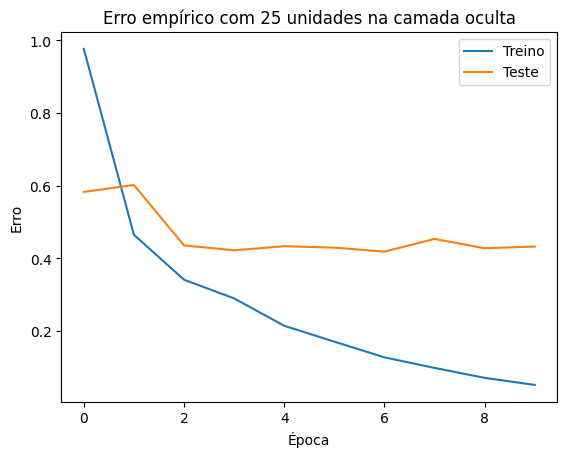

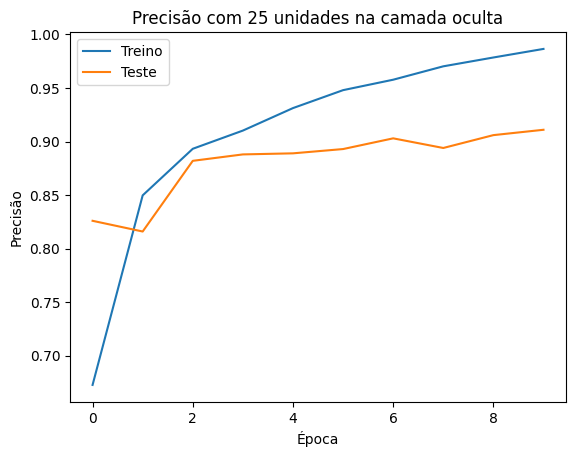

Epoch 1/10
400/400 [==============================] - 2s 5ms/step - loss: 0.9016 - accuracy: 0.6885 - val_loss: 0.5189 - val_accuracy: 0.8320
Epoch 2/10
400/400 [==============================] - 2s 5ms/step - loss: 0.3755 - accuracy: 0.8777 - val_loss: 0.4465 - val_accuracy: 0.8670
Epoch 3/10
400/400 [==============================] - 2s 5ms/step - loss: 0.2618 - accuracy: 0.9150 - val_loss: 0.3725 - val_accuracy: 0.8920
Epoch 4/10
400/400 [==============================] - 2s 5ms/step - loss: 0.1963 - accuracy: 0.9400 - val_loss: 0.3909 - val_accuracy: 0.8830
Epoch 5/10
400/400 [==============================] - 2s 5ms/step - loss: 0.1369 - accuracy: 0.9570 - val_loss: 0.3590 - val_accuracy: 0.8990
Epoch 6/10
400/400 [==============================] - 2s 5ms/step - loss: 0.0923 - accuracy: 0.9707 - val_loss: 0.3703 - val_accuracy: 0.8980
Epoch 7/10
400/400 [==============================] - 2s 5ms/step - loss: 0.0703 - accuracy: 0.9800 - val_loss: 0.3508 - val_accuracy: 0.9100
Epoch 

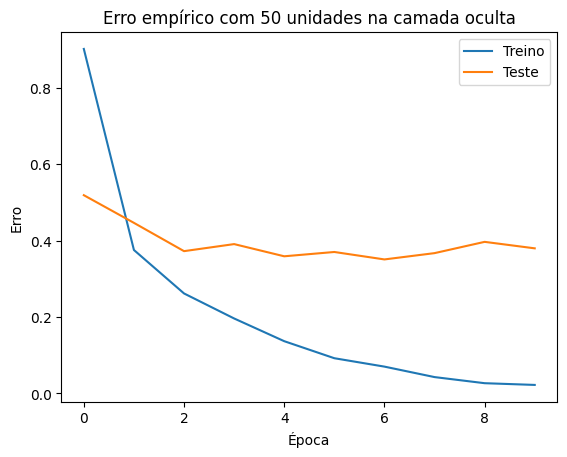

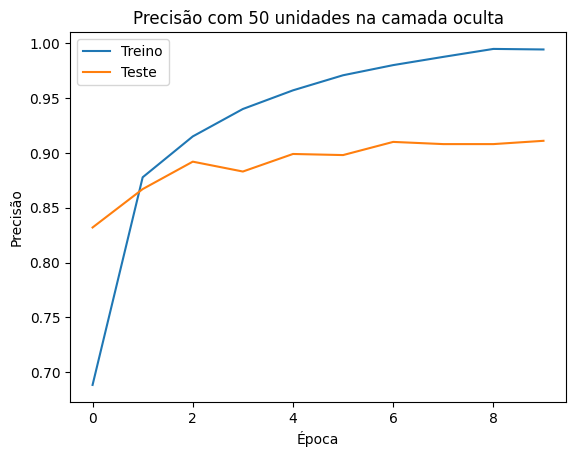

Epoch 1/10
400/400 [==============================] - 3s 6ms/step - loss: 0.9438 - accuracy: 0.6775 - val_loss: 0.7037 - val_accuracy: 0.7250
Epoch 2/10
400/400 [==============================] - 2s 5ms/step - loss: 0.3771 - accuracy: 0.8710 - val_loss: 0.4303 - val_accuracy: 0.8600
Epoch 3/10
400/400 [==============================] - 2s 5ms/step - loss: 0.2580 - accuracy: 0.9107 - val_loss: 0.4306 - val_accuracy: 0.8740
Epoch 4/10
400/400 [==============================] - 2s 5ms/step - loss: 0.1763 - accuracy: 0.9405 - val_loss: 0.3483 - val_accuracy: 0.9110
Epoch 5/10
400/400 [==============================] - 2s 5ms/step - loss: 0.1264 - accuracy: 0.9607 - val_loss: 0.3731 - val_accuracy: 0.9070
Epoch 6/10
400/400 [==============================] - 2s 5ms/step - loss: 0.0978 - accuracy: 0.9680 - val_loss: 0.3787 - val_accuracy: 0.9020
Epoch 7/10
400/400 [==============================] - 2s 5ms/step - loss: 0.0610 - accuracy: 0.9820 - val_loss: 0.3771 - val_accuracy: 0.9150
Epoch 

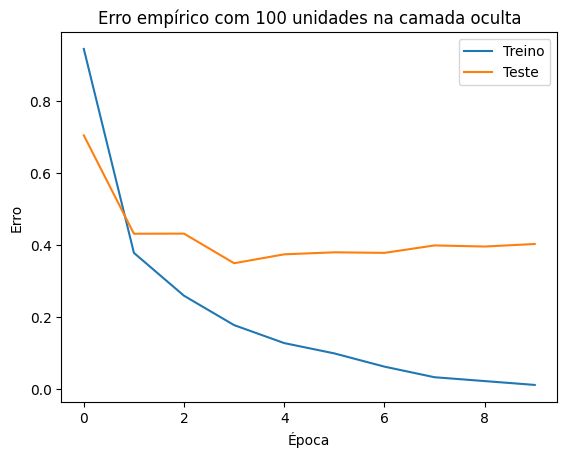

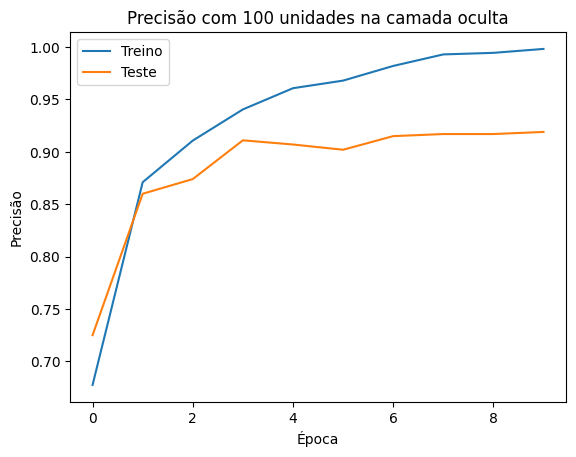

In [ ]:
# Variando o número de unidades na camada oculta
for hidden_units in [25, 50, 100]:
    model = Sequential()
    model.add(Dense(784, input_shape=(784,), activation='sigmoid'))
    model.add(Dense(hidden_units, activation='sigmoid'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.5), metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, batch_size=10, validation_data=(x_test, y_test))

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Erro empírico com {hidden_units} unidades na camada oculta')
    plt.xlabel('Época')
    plt.ylabel('Erro')
    plt.legend(['Treino', 'Teste'])
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Precisão com {hidden_units} unidades na camada oculta')
    plt.xlabel('Época')
    plt.ylabel('Precisão')
    plt.legend(['Treino', 'Teste'])
    plt.show()

Epoch 1/10
400/400 [==============================] - 3s 6ms/step - loss: 0.0072 - accuracy: 0.9992 - val_loss: 0.4167 - val_accuracy: 0.9130
Epoch 2/10
400/400 [==============================] - 2s 5ms/step - loss: 0.0049 - accuracy: 0.9998 - val_loss: 0.4121 - val_accuracy: 0.9170
Epoch 3/10
400/400 [==============================] - 2s 5ms/step - loss: 0.0037 - accuracy: 0.9995 - val_loss: 0.4200 - val_accuracy: 0.9200
Epoch 4/10
400/400 [==============================] - 2s 5ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4282 - val_accuracy: 0.9190
Epoch 5/10
400/400 [==============================] - 2s 5ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4364 - val_accuracy: 0.9180
Epoch 6/10
400/400 [==============================] - 2s 5ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4365 - val_accuracy: 0.9190
Epoch 7/10
400/400 [==============================] - 2s 5ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4396 - val_accuracy: 0.9190
Epoch 

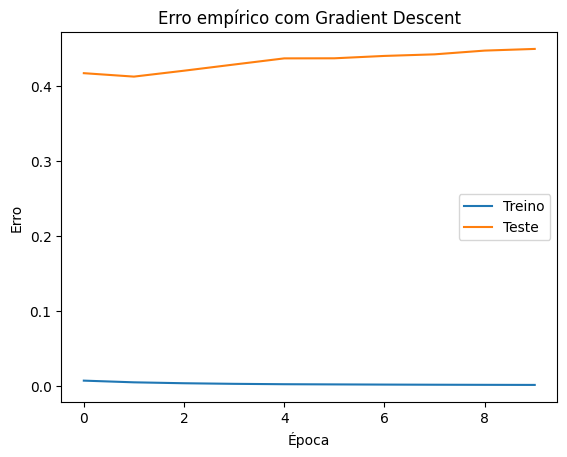

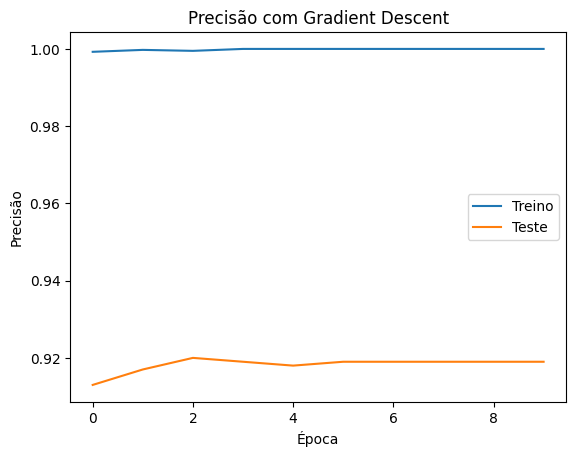

Epoch 1/10
400/400 [==============================] - 3s 6ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4517 - val_accuracy: 0.9190
Epoch 2/10
400/400 [==============================] - 2s 6ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4520 - val_accuracy: 0.9180
Epoch 3/10
400/400 [==============================] - 2s 6ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4539 - val_accuracy: 0.9190
Epoch 4/10
400/400 [==============================] - 2s 6ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4579 - val_accuracy: 0.9200
Epoch 5/10
400/400 [==============================] - 3s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4606 - val_accuracy: 0.9180
Epoch 6/10
400/400 [==============================] - 2s 6ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4627 - val_accuracy: 0.9180
Epoch 7/10
400/400 [==============================] - 2s 6ms/step - loss: 9.5122e-04 - accuracy: 1.0000 - val_loss: 0.4642 - val_accuracy: 0.9190
Ep

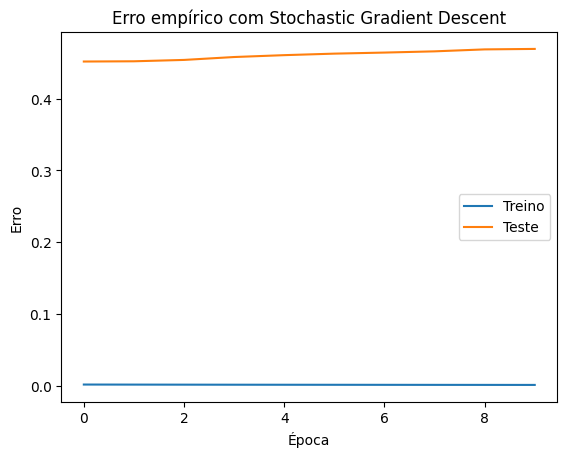

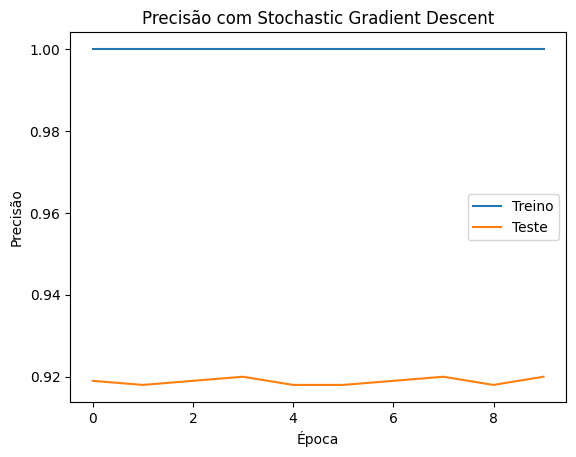

Epoch 1/10
400/400 [==============================] - 3s 6ms/step - loss: 7.9092e-04 - accuracy: 1.0000 - val_loss: 0.4707 - val_accuracy: 0.9200
Epoch 2/10
400/400 [==============================] - 2s 6ms/step - loss: 7.6092e-04 - accuracy: 1.0000 - val_loss: 0.4730 - val_accuracy: 0.9180
Epoch 3/10
400/400 [==============================] - 2s 6ms/step - loss: 7.3107e-04 - accuracy: 1.0000 - val_loss: 0.4745 - val_accuracy: 0.9200
Epoch 4/10
400/400 [==============================] - 2s 6ms/step - loss: 7.0428e-04 - accuracy: 1.0000 - val_loss: 0.4763 - val_accuracy: 0.9180
Epoch 5/10
400/400 [==============================] - 2s 6ms/step - loss: 6.7765e-04 - accuracy: 1.0000 - val_loss: 0.4770 - val_accuracy: 0.9200
Epoch 6/10
400/400 [==============================] - 2s 6ms/step - loss: 6.5368e-04 - accuracy: 1.0000 - val_loss: 0.4786 - val_accuracy: 0.9180
Epoch 7/10
400/400 [==============================] - 2s 6ms/step - loss: 6.3113e-04 - accuracy: 1.0000 - val_loss: 0.4794 -

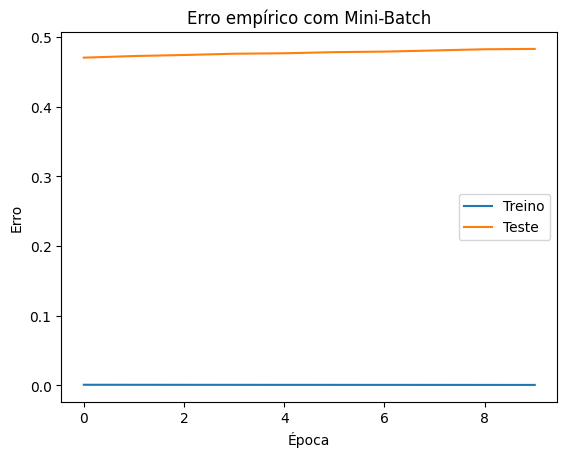

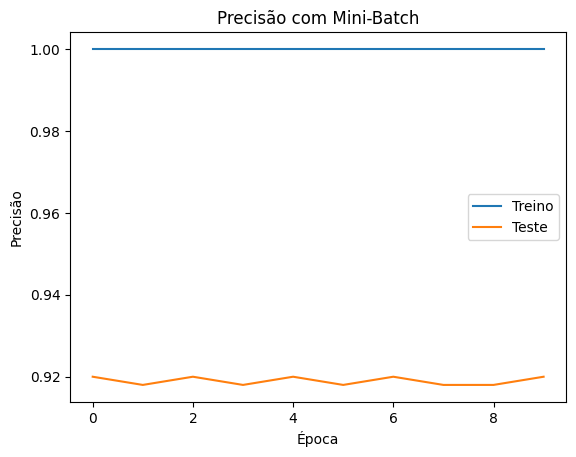

In [ ]:
# Variando o algoritmo de cálculo do gradiente
for gradient_algorithm in ['Gradient Descent', 'Stochastic Gradient Descent', 'Mini-Batch']:
    if gradient_algorithm == 'Gradient Descent':
        optimizer = SGD(lr=0.5)
    elif gradient_algorithm == 'Stochastic Gradient Descent':
        optimizer = SGD(lr=0.5, nesterov=True)
    elif gradient_algorithm == 'Mini-Batch':
        optimizer = SGD(lr=0.5, nesterov=True)

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, batch_size=10, validation_data=(x_test, y_test))

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Erro empírico com {gradient_algorithm}')
    plt.xlabel('Época')
    plt.ylabel('Erro')
    plt.legend(['Treino', 'Teste'])
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Precisão com {gradient_algorithm}')
    plt.xlabel('Época')
    plt.ylabel('Precisão')
    plt.legend(['Treino', 'Teste'])
    plt.show()

Epoch 1/10
400/400 [==============================] - 3s 6ms/step - loss: 5.5553e-04 - accuracy: 1.0000 - val_loss: 0.4849 - val_accuracy: 0.9190
Epoch 2/10
400/400 [==============================] - 2s 6ms/step - loss: 5.4020e-04 - accuracy: 1.0000 - val_loss: 0.4857 - val_accuracy: 0.9190
Epoch 3/10
400/400 [==============================] - 2s 6ms/step - loss: 5.2401e-04 - accuracy: 1.0000 - val_loss: 0.4870 - val_accuracy: 0.9190
Epoch 4/10
400/400 [==============================] - 2s 6ms/step - loss: 5.0885e-04 - accuracy: 1.0000 - val_loss: 0.4880 - val_accuracy: 0.9190
Epoch 5/10
400/400 [==============================] - 2s 6ms/step - loss: 4.9555e-04 - accuracy: 1.0000 - val_loss: 0.4893 - val_accuracy: 0.9190
Epoch 6/10
400/400 [==============================] - 2s 6ms/step - loss: 4.8167e-04 - accuracy: 1.0000 - val_loss: 0.4899 - val_accuracy: 0.9190
Epoch 7/10
400/400 [==============================] - 2s 6ms/step - loss: 4.6980e-04 - accuracy: 1.0000 - val_loss: 0.4913 -

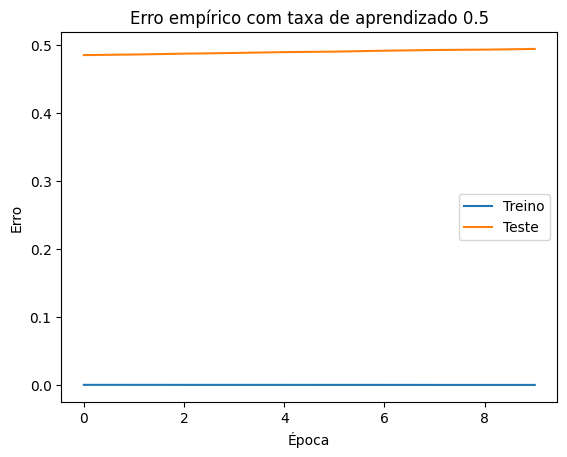

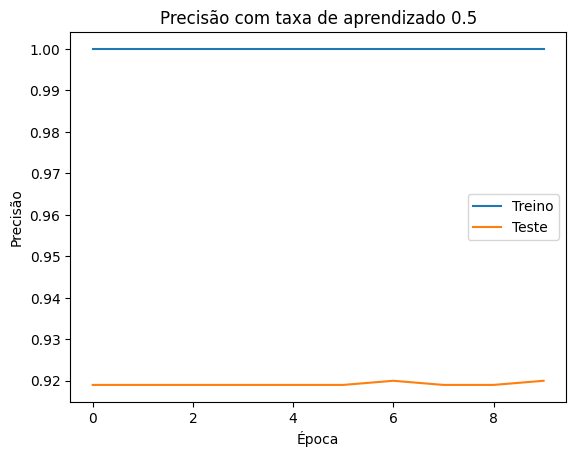

Epoch 1/10
400/400 [==============================] - 3s 6ms/step - loss: 4.3173e-04 - accuracy: 1.0000 - val_loss: 0.4965 - val_accuracy: 0.9190
Epoch 2/10
400/400 [==============================] - 2s 6ms/step - loss: 4.1135e-04 - accuracy: 1.0000 - val_loss: 0.4975 - val_accuracy: 0.9190
Epoch 3/10
400/400 [==============================] - 2s 6ms/step - loss: 3.9124e-04 - accuracy: 1.0000 - val_loss: 0.4991 - val_accuracy: 0.9200
Epoch 4/10
400/400 [==============================] - 2s 6ms/step - loss: 3.7557e-04 - accuracy: 1.0000 - val_loss: 0.5012 - val_accuracy: 0.9180
Epoch 5/10
400/400 [==============================] - 2s 6ms/step - loss: 3.5981e-04 - accuracy: 1.0000 - val_loss: 0.5032 - val_accuracy: 0.9200
Epoch 6/10
400/400 [==============================] - 2s 6ms/step - loss: 3.4466e-04 - accuracy: 1.0000 - val_loss: 0.5050 - val_accuracy: 0.9190
Epoch 7/10
400/400 [==============================] - 2s 6ms/step - loss: 3.3149e-04 - accuracy: 1.0000 - val_loss: 0.5063 -

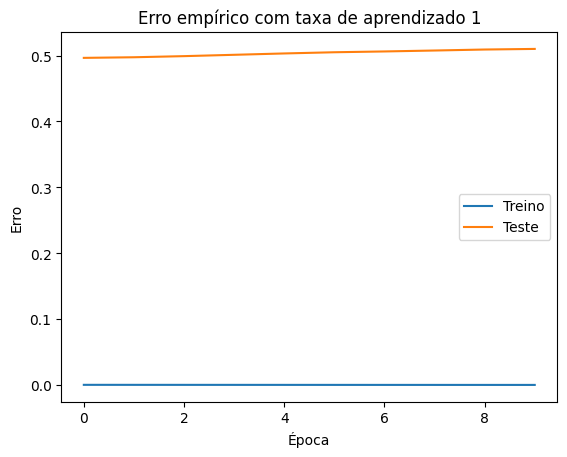

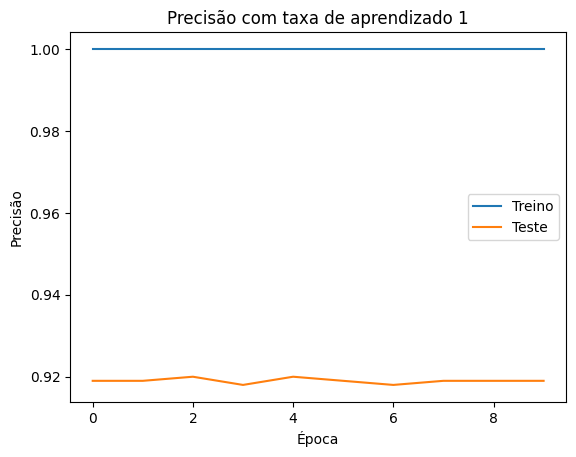

Epoch 1/10
400/400 [==============================] - 3s 6ms/step - loss: 27.9411 - accuracy: 0.7795 - val_loss: 62.5836 - val_accuracy: 0.2050
Epoch 2/10
400/400 [==============================] - 2s 6ms/step - loss: 95.3626 - accuracy: 0.1213 - val_loss: 91.9625 - val_accuracy: 0.0980
Epoch 3/10
400/400 [==============================] - 2s 6ms/step - loss: 94.5599 - accuracy: 0.1152 - val_loss: 53.6371 - val_accuracy: 0.1850
Epoch 4/10
400/400 [==============================] - 2s 6ms/step - loss: 81.2964 - accuracy: 0.1398 - val_loss: 89.0645 - val_accuracy: 0.1620
Epoch 5/10
400/400 [==============================] - 2s 6ms/step - loss: 98.0304 - accuracy: 0.1123 - val_loss: 148.1589 - val_accuracy: 0.1060
Epoch 6/10
400/400 [==============================] - 2s 6ms/step - loss: 112.7969 - accuracy: 0.0950 - val_loss: 78.5383 - val_accuracy: 0.0890
Epoch 7/10
400/400 [==============================] - 2s 6ms/step - loss: 111.3950 - accuracy: 0.0993 - val_loss: 132.8365 - val_accur

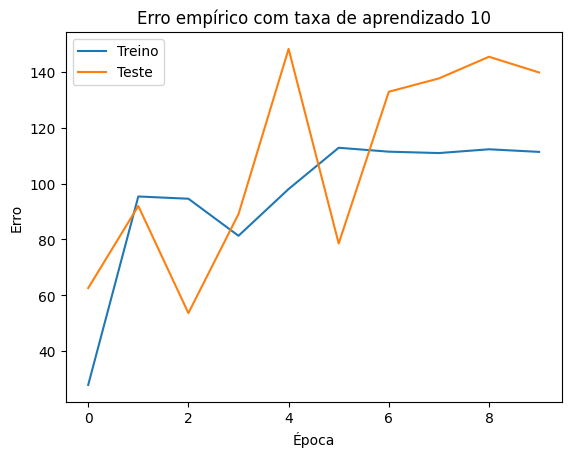

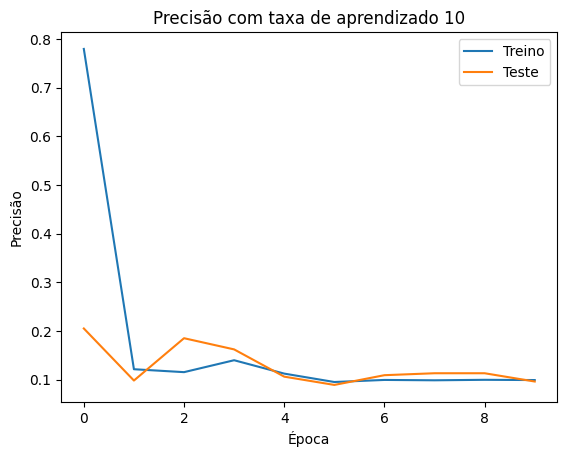

In [ ]:
# Variando a taxa de aprendizado
for learning_rate in [0.5, 1, 10]:
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=learning_rate), metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, batch_size=10, validation_data=(x_test, y_test))

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Erro empírico com taxa de aprendizado {learning_rate}')
    plt.xlabel('Época')
    plt.ylabel('Erro')
    plt.legend(['Treino', 'Teste'])
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Precisão com taxa de aprendizado {learning_rate}')
    plt.xlabel('Época')
    plt.ylabel('Precisão')
    plt.legend(['Treino', 'Teste'])
    plt.show()

## Discussão dos Resultados

### Precisão de Treinamento e Teste

#### 25 Unidades na Camada Oculta
- **Treino**: A precisão de treino aumenta rapidamente nas primeiras épocas e continua a melhorar, atingindo quase 100% ao final das épocas.
- **Teste**: A precisão de teste também aumenta inicialmente, mas estabiliza em torno de 90%, com pequenas flutuações. Isso sugere que o modelo está se ajustando bem aos dados de treinamento, mas não generaliza tão bem para os dados de teste, indicando um possível overfitting.

#### 50 Unidades na Camada Oculta
- **Treino**: A precisão de treino também aumenta rapidamente e atinge quase 100% ao final das épocas, similar ao caso com 25 unidades.
- **Teste**: A precisão de teste estabiliza em torno de 90%, com uma leve tendência de aumento, mas ainda com pequenas flutuações. Isso indica que aumentar o número de unidades na camada oculta não melhora significativamente a generalização.

#### 100 Unidades na Camada Oculta
- **Treino**: A precisão de treino aumenta rapidamente nas primeiras épocas e continua a melhorar, atingindo quase 100% ao final das épocas.
- **Teste**: A precisão de teste também aumenta inicialmente, mas estabiliza em torno de 90%, com pequenas flutuações. Novamente, isso sugere que o aumento do número de unidades na camada oculta não está resolvendo o problema de generalização.

### Erro Empírico

#### 25 Unidades na Camada Oculta
- **Treino**: O erro de treino diminui constantemente ao longo das épocas, indicando que o modelo está aprendendo bem.
- **Teste**: O erro de teste diminui inicialmente, mas depois estabiliza e até aumenta ligeiramente, sugerindo um possível overfitting.

#### 50 Unidades na Camada Oculta
- **Treino**: O erro de treino também diminui constantemente, similar ao caso com 25 unidades, mas atinge valores ainda mais baixos.
- **Teste**: O erro de teste diminui inicialmente e depois estabiliza, com uma leve tendência de aumento, indicando um comportamento similar ao caso com 25 unidades.

#### 100 Unidades na Camada Oculta
- **Treino**: O erro de treino diminui constantemente ao longo das épocas, indicando que o modelo está aprendendo bem.
- **Teste**: O erro de teste diminui inicialmente, mas depois estabiliza e até aumenta ligeiramente, sugerindo um possível overfitting.

### Análise dos Algoritmos de Cálculo de Gradiente

#### Stochastic Gradient Descent (SGD)
- **Precisão**: A precisão de treinamento é consistentemente alta (próxima de 1.0) ao longo das épocas, enquanto a precisão de teste permanece em torno de 0.92. Isso sugere que o modelo está se ajustando muito bem aos dados de treinamento, mas não generaliza tão bem para os dados de teste, indicando um possível overfitting.
- **Erro Empírico**: O erro de treinamento é muito baixo, enquanto o erro de teste é significativamente mais alto e aumenta ligeiramente ao longo das épocas. Isso reforça a hipótese de overfitting.

#### Gradient Descent (GD)
- **Precisão**: A precisão de treinamento também é alta, mas ligeiramente inferior à do SGD. A precisão de teste é similar à do SGD, sugerindo que ambos os algoritmos têm um desempenho comparável em termos de generalização.
- **Erro Empírico**: O erro de treinamento é baixo, mas um pouco maior do que o do SGD. O erro de teste segue um padrão semelhante ao do SGD, aumentando ligeiramente ao longo das épocas.

#### Mini-Batch Gradient Descent
- **Precisão**: A precisão de treinamento é consistentemente alta (próxima de 1.0) ao longo das épocas, enquanto a precisão de teste permanece em torno de 0.92. Isso sugere que o modelo está se ajustando muito bem aos dados de treinamento, mas não generaliza tão bem para os dados de teste, indicando um possível overfitting.
- **Erro Empírico**: O erro de treinamento é muito baixo, enquanto o erro de teste é significativamente mais alto e aumenta ligeiramente ao longo das épocas. Isso reforça a hipótese de overfitting.

### Hipóteses Pertinentes

1. **Overfitting**: Os resultados sugerem que todos os três algoritmos (SGD, GD e Mini-Batch GD) estão sofrendo de overfitting, pois a precisão de teste é significativamente menor que a precisão de treinamento, e o erro de teste é maior que o erro de treinamento.

2. **Capacidade do Modelo**: É possível que a capacidade do modelo (número de unidades na camada oculta) não seja suficiente para capturar a complexidade dos dados, levando a um desempenho limitado na generalização.

3. **Regularização**: Técnicas de regularização, como dropout ou penalização de pesos, podem ser necessárias para reduzir o overfitting e melhorar a generalização do modelo.

4. **Aumento de Dados**: Aumentar o conjunto de dados de treinamento pode ajudar o modelo a generalizar melhor, reduzindo o overfitting.

5. **Hiperparâmetros**: Ajustar hiperparâmetros, como a taxa de aprendizado e o número de épocas, pode levar a um melhor desempenho do modelo.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=27846989-239d-4332-9b2f-d732e3942e53' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>